In [79]:
import pandas as pd
import numpy as np
import random
import os
import pandas_profiling
from datetime import datetime

# Graph
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, PowerTransformer, PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.utils import resample
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import QuantileRegressor
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.cluster import KMeans
from sklearn.manifold import MDS, TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve, average_precision_score
from sklearn.metrics import calinski_harabasz_score

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import xgboost

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from tensorflow import keras
import tensorflow as tf

from scipy import stats
from scipy.stats import uniform, randint, trim_mean
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from scipy.stats import shapiro, normaltest
from statsmodels.stats.diagnostic import kstest_normal
from scipy.stats import levene
from scipy.stats import chisquare, chi2_contingency
from scipy.stats import skew, kurtosis
from scipy.stats import wilcoxon

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.sandbox.stats.runs import Runs, runstest_1samp
from statsmodels.stats.contingency_tables import mcnemar

import scikit_posthocs

import pingouin as pg
from pingouin import partial_corr

# arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from pmdarima import auto_arima

# association
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

# step 
from dmba import stepwise_selection, forward_selection, backward_elimination
from dmba import AIC_score

from sklearn.feature_selection import SelectPercentile, f_classif, SelectFromModel, RFE

# regression
# from pygam import LinearGAM, s, l
# from pygam.datasets import wage

# tresh
import warnings
warnings.filterwarnings('ignore')

In [2]:
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
# %matplotlib notebook

In [3]:
# pd.set_option('precision', 3)
%precision 3

'%.3f'

In [4]:
# 모든 행/렬 출력
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [ ]:
import pip_search
!pip_search sklearn

# 1. EDA

In [5]:
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()

In [7]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target.astype('object')

In [8]:
target_table = {i : j for i, j in enumerate(iris.target_names)}
df['target_nm'] = df.target.map(target_table)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
 5   target_nm          150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [10]:
df.describe(exclude='number')
# df.describe()

,target,target_nm
count,150,150
unique,3,3
top,0,setosa
freq,50,50


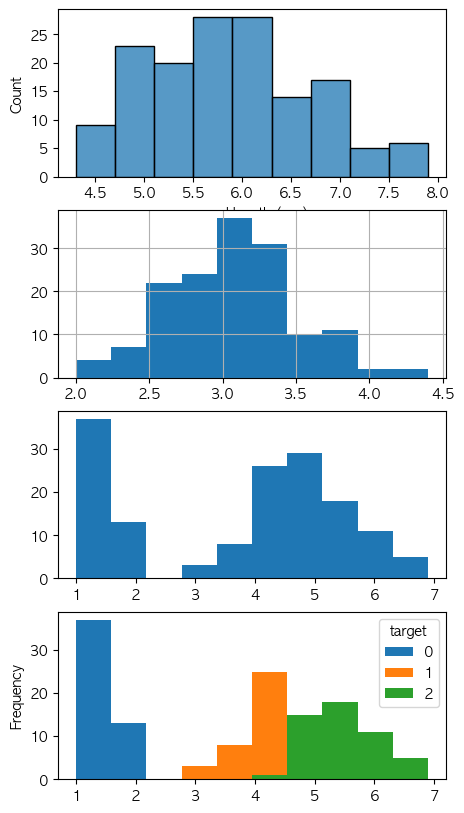

In [11]:
fig, ax = plt.subplots(4,1, figsize=(5,10))
sns.histplot(df.iloc[:,0], ax=ax[0])
df.iloc[:,1].hist(ax=ax[1])
ax[2].hist(df.iloc[:,2])
df[['target','petal length (cm)']].pivot(columns='target', values='petal length (cm)').plot.hist(ax=ax[3])
plt.show()

In [12]:
df_group_mean = df.groupby('target').mean()
df_group_mean

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


<Axes: xlabel='target'>

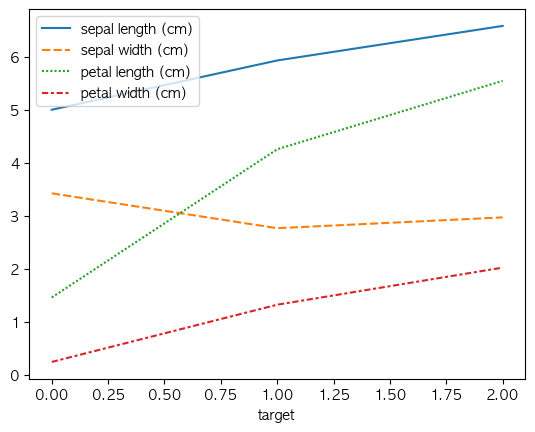

In [13]:
sns.lineplot(df_group_mean)

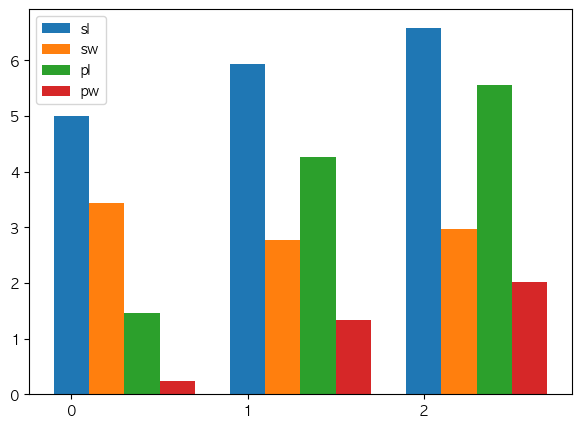

In [14]:
plt.figure(figsize=(7,5))
plt.bar(x= df_group_mean.index, height=df_group_mean['sepal length (cm)'], width=0.2, label='sl')
plt.bar(x= df_group_mean.index+0.2, height=df_group_mean['sepal width (cm)'], width=0.2, label='sw')
plt.bar(x= df_group_mean.index+0.4, height=df_group_mean['petal length (cm)'], width=0.2, label='pl')
plt.bar(x= df_group_mean.index+0.6, height=df_group_mean['petal width (cm)'], width=0.2, label='pw')

plt.xticks(range(0,3))
# sns.histplot(df_group_mean[df_group_mean.index ==0], binwidth=0.5, color='red', alpha=0.7)
# sns.histplot(df_group_mean[df_group_mean.index ==1], binwidth=0.5, color='blue', alpha=0.7)
# sns.histplot(df_group_mean[df_group_mean.index ==2], binwidth=0.5, color='gray', alpha=0.7)
plt.legend()
plt.show()

<Axes: >

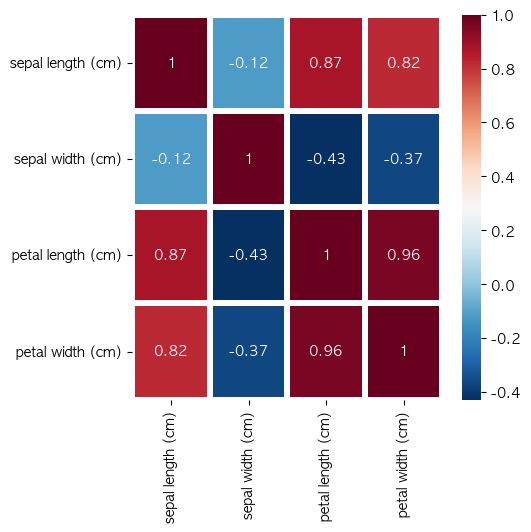

In [15]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, linewidth=3)

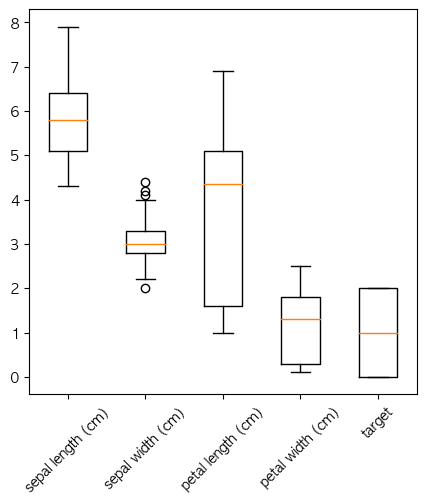

In [16]:
plt.figure(figsize=(5,5))
plt.boxplot(df.iloc[:,:-1])
plt.xticks(range(1, len(df.iloc[:,:-1].columns) + 1), df.iloc[:,:-1].columns, rotation=45)
plt.show()

In [17]:
# sns.catplot(x='sepal length (cm)', y='sepal width (cm)',hue='target', data=df, kind ='bar')

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

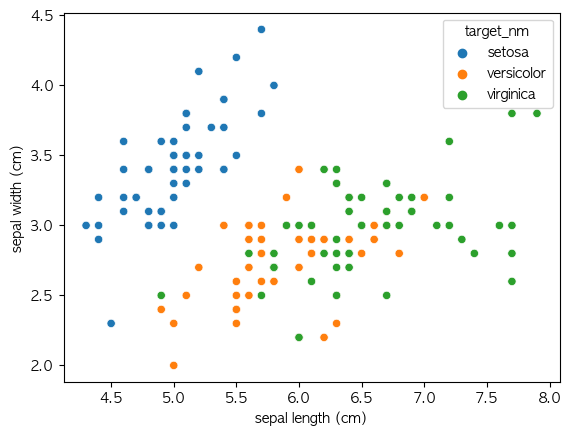

In [18]:
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df.target_nm)

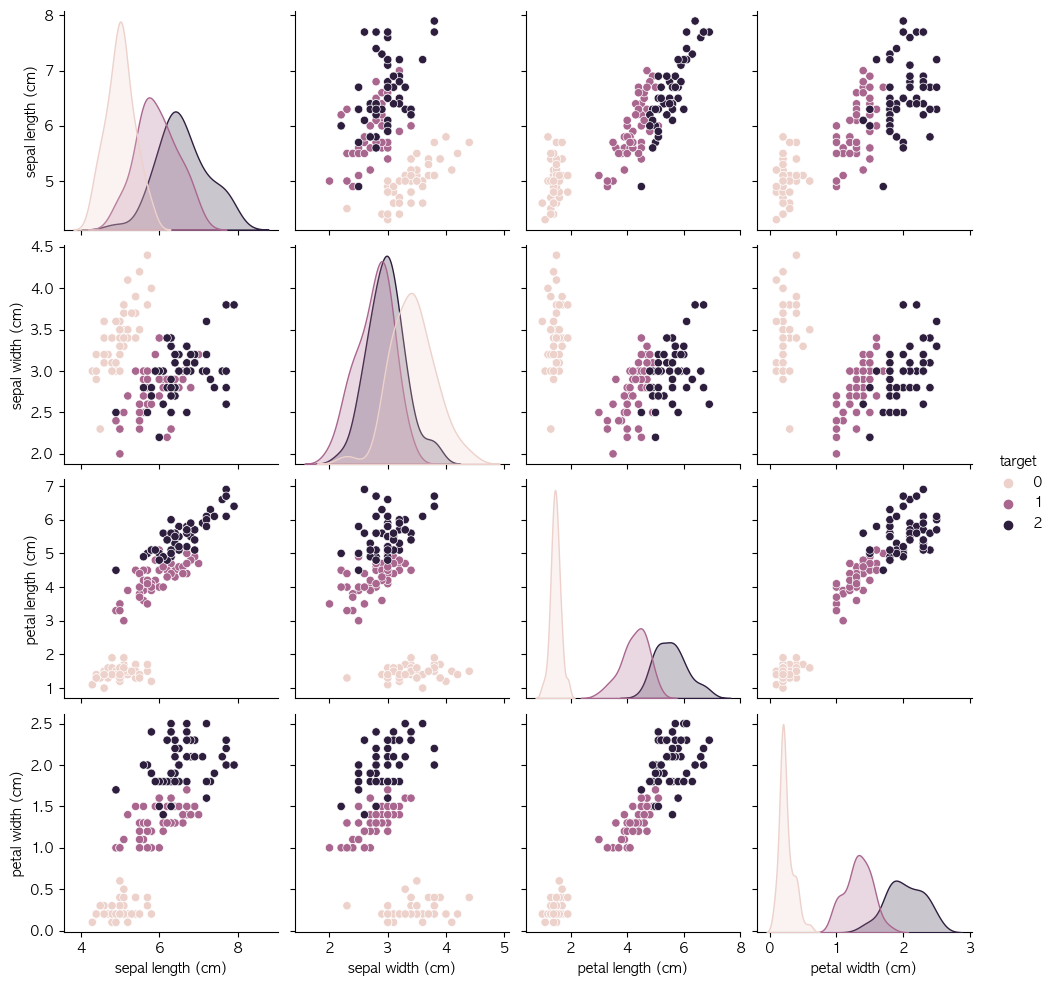

In [19]:
sns.pairplot(df, hue="target")
plt.show()

# 결측치

In [20]:
df.iloc[130, 1] = None
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     0
target               0
target_nm            0
dtype: int64

In [21]:
target_col = df.columns[1]
df_col_idx1_mean = df.iloc[:,1].mean()
df.loc[df.iloc[:,1].isna()==True, target_col] = df_col_idx1_mean

In [22]:
df = df.dropna(subset = target_col, axis=0)

In [ ]:
health.fillna(health.mean()) # 각 평균으로 대치
health.fillna(method='ffill') # 이전값으로 대치
health.groupby('연도').transform(lambda x: x.fillna(x.mean()))
sample_df.groupby('group')['first'].shift(-2)

# 이상치

In [27]:
q3 = np.quantile(df.iloc[:,1], 0.75)
q1 = np.quantile(df.iloc[:,1], 0.25)
iqr = (q3-q1) * 1.75
upper_outlier = q3 + iqr
lower_outlier = q1 - iqr
outliers = df.loc[(df.iloc[:,1] > upper_outlier) | (df.iloc[:,1] < lower_outlier)].index

## 중복값 제거

In [29]:
df.drop_duplicates(inplace=True)

# Row/Column 삭제

In [30]:
df.drop(index=outliers)
df.drop(columns='target').head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_nm
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2. 전처리

In [31]:
df_melt = pd.melt(df)
df_melt.head()

,variable,value
0,sepal length (cm),5.1
1,sepal length (cm),4.9
2,sepal length (cm),4.7
3,sepal length (cm),4.6
4,sepal length (cm),5.0


In [34]:
# 정규화
mm_scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
iris_mm_scaled = mm_scaler.fit_transform(df.iloc[:,:-1])

In [35]:
# 표준화
ss_scaler = StandardScaler()
iris_ss_scaled = ss_scaler.fit_transform(df.iloc[:,:-1])
pd.DataFrame(iris_ss_scaled, columns=df.columns[:-1]).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.898033,1.009620,-1.333255,-1.308624,-1.218613
1,-1.139562,-0.141522,-1.333255,-1.308624,-1.218613
2,-1.381091,0.318935,-1.390014,-1.308624,-1.218613
3,-1.501855,0.088707,-1.276496,-1.308624,-1.218613
4,-1.018798,1.239849,-1.333255,-1.308624,-1.218613


In [36]:
# log변환 (값이 클떄나 시계열에서 사용)
np.log1p(df.iloc[:,:-3]) # 1p 사용한는 것은 0일 때 underflow방지

,sepal length (cm),sepal width (cm),petal length (cm)
0,1.808289,1.504077,0.875469
1,1.774952,1.386294,0.875469
2,1.740466,1.435085,0.832909
3,1.722767,1.410987,0.916291
4,1.791759,1.526056,0.875469
...,...,...,...
145,2.041220,1.386294,1.824549
146,1.987874,1.252763,1.791759
147,2.014903,1.386294,1.824549
148,1.974081,1.481605,1.856298


In [37]:
# label encode - 각 컬럼별로 수행해야 함, 순서가 필요할 때 사용
lb_enc = LabelEncoder()
iris_lb_enc = lb_enc.fit_transform(df.iloc[:,-1])
df['iris_lb'] = iris_lb_enc
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_nm,iris_lb
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0


In [38]:
# label encode - 각 컬럼별로 수행해야 함, 순서가 필요할 때 사용
pd.get_dummies(df).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_lb,target_0,target_1,target_2,target_nm_setosa,target_nm_versicolor,target_nm_virginica
0,5.1,3.5,1.4,0.2,0,1,0,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0,1,0,0


In [39]:
pd.get_dummies(df.drop(columns=['target'])).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_lb,target_nm_setosa,target_nm_versicolor,target_nm_virginica
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0


In [40]:
# 전처리기타
df['cums'] = df.target.transform('cumsum')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_nm,iris_lb,cums
0,5.1,3.5,1.4,0.2,0,setosa,0,0
1,4.9,3.0,1.4,0.2,0,setosa,0,0
2,4.7,3.2,1.3,0.2,0,setosa,0,0
3,4.6,3.1,1.5,0.2,0,setosa,0,0
4,5.0,3.6,1.4,0.2,0,setosa,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,2,140
146,6.3,2.5,5.0,1.9,2,virginica,2,142
147,6.5,3.0,5.2,2.0,2,virginica,2,144
148,6.2,3.4,5.4,2.3,2,virginica,2,146


# 특성 선택 (파이썬 라이브러를 활용한 머신러닝)

In [75]:
house = pd.read_csv('./data/house_sales.csv', sep='\t')
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms','BldgGrade']
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms','BldgGrade']
outcome = 'AdjSalePrice'

In [76]:
predictors = ['SqFtLot', 'SqFtTotLiving', 'Bathrooms', 'Bedrooms','PropertyType',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise',
       'ImpsVal', 'ZipCode', 'NewConstruction']

In [78]:
X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
results.summary()

y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, 
                                                verbose=True)

print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: SqFtLot, SqFtTotLiving, Bathrooms, Bedrooms, BldgGrade, YrBuilt, YrRenovated, TrafficNoise, ImpsVal, ZipCode, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=621087.84, add ImpsVal
Step: score=620437.40, add SqFtTotLiving
Step: score=619661.90, add YrBuilt
Step: score=619112.54, add BldgGrade
Step: score=618873.30, add ZipCode
Step: score=618770.05, add Bedrooms
Step: score=618726.89, add SqFtLot
Step: score=618708.46, add YrRenovated
Step: score=618699.25, add NewConstruction
Step: score=618698.55, add TrafficNoise
Step: score=618698.55, unchanged None
Intercept: 45751673.759
Coefficients:
 ImpsVal: 1.119001667749545
 SqFtTotLiving: 61.72760671908378
 YrBuilt: -2077.2414130461198
 BldgGrade: 47136.17711662532
 ZipCode: -426.74566783342135
 Bedrooms: -18857.71905541134
 SqFtLot: 0.3055486741899697
 YrRenovated: -14.27876143663052
 NewConstruction: -15916.156221435878
 TrafficNoise: -4030.8869705518505


# 데이터 분할

In [51]:
X_data = df.iloc[:,:4]
y_data = df.iloc[:,4].astype('int')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42, test_size=0.2)

# 모델링

In [53]:
y_train.value_counts()

1    41
0    40
2    38
Name: target, dtype: int64

In [63]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

1.0


In [77]:
kfold = KFold()
kfold_shuffle = StratifiedKFold()

In [78]:
cross_val_score(knn, X_train, y_train, cv=kfold_shuffle)

array([1.   , 0.917, 0.917, 1.   , 0.957])

In [73]:
param = {'n_neighbors' : range(1, 10)}
grid = GridSearchCV(knn,  param_grid = param)
start_time = datetime.now()
grid.fit(X_train, y_train)
end_time = datetime.now()
print('fitted time : ', end_time - start_time)

fitted time :  0:00:00.185051


In [74]:
grid.score(X_test, y_test)

1.000

In [80]:
grid_result = grid.predict(X_test)

In [82]:
print(classification_report(y_test, grid_result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 비지도학습

In [72]:
def elbow(X):s
    sse=[]
    for i in range(1, 11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(1,11), sse, marker='o')
    plt.show()
    print(sse)

# SOM

SOM Structrue
SOM 은 우선 Map size 를 설정해줍니다. (2차원으로 x=3, y=3 크기의 Map 이라고 가정합시다)
Map Size 를 설정해, 전혀 학습하지 않은 생 Map 을 Default Map 이라고 칭하겠습니다.
이제 이 Default Map 을 조금씩 수정해서(학습해서) 데이터 분포 형태에 Map 을 근사시키려고 합니다.
3*3 사이즈의 map 은 9개의 map point = Node 로 이루어졍있고, 각 Node 는 데이터의 차원수와 동일한 parameter 갯수를 가집니다.
사진에서는 3차원 X(x1,x2,x3) 데이터 이므로 Node_i(w_i1, w_i2, w_i3) 가 i=1~9 로 존재합니다.
이제 이 각각의 Node 들과 각 데이터 X 사이의 거리를 구합니다.
이들중 데이터와 가장 가까운 node 를 winning node 라고 마킹합니다.

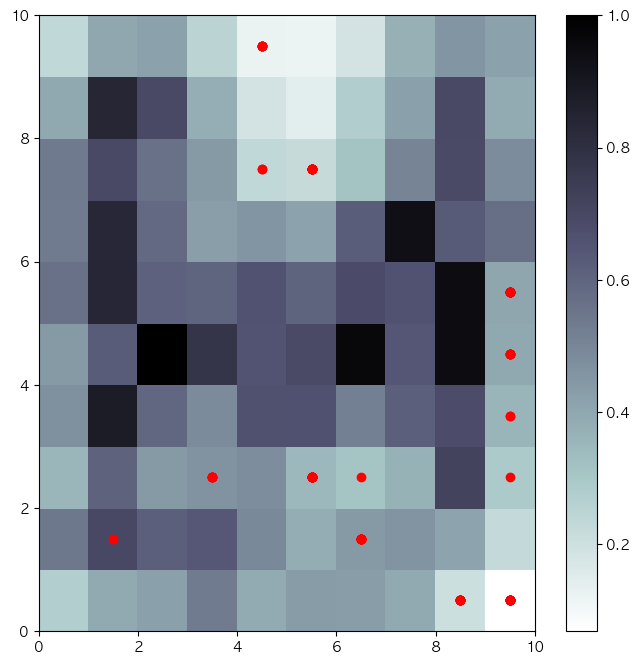

In [75]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# Generate some sample data
X, y = make_blobs(n_samples=100, n_features=2, centers=4, random_state=42)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define the dimensions of the SOM grid
grid_size = (10, 10)  # 10x10 grid

# Initialize the SOM
som = MiniSom(grid_size[0], grid_size[1], input_len=X.shape[1])

# Training the SOM
som.train_random(X, 100)  # 100 iterations

# Visualize the result
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # distance map as background
plt.colorbar()

# Add data points to the map
for i, x in enumerate(X):
    w = som.winner(x)  # find the winner neuron
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'ro')  # mark the winner neuron

plt.show()